# THE SPARKS FOUNDATION
# Data Science & Business Analytics Internship - MAY 2021
# Work by - Abir Naha
# Task 1 : Prediction Using Supervised ML
## Objective : To predict the percentage score of a student based on their hours of study.

## 1. Importing Necessary Libraries

In [23]:
#basic libraries
import numpy as np
import pandas as pd

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## 2. Importing Data and Basics

In [2]:
#retriving data from external source
data = pd.read_csv('http://bit.ly/w-data')
print('Data retrieved succesfully')

Data retrieved succesfully


In [3]:
#looking at the first 10 observations of the dataset
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#checking data columns and their datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


The dataset has two columns and both contain continous numerical values

In [5]:
#basic statistics about data columns
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## 2. Dataset Quality Assesment 

In [6]:
#checking volume of the data
print('The dataset has {} rows and {} columns'.format(data.shape[0],data.shape[1]))

The dataset has 25 rows and 2 columns


In [7]:
#checking for missing values
missing = data.isna().sum()
if(missing.sum()==0):
    print('Data contains no missing values!')
else:
    print('Data contains a total of {} missing values'.format(missing.sum()))

Data contains no missing values!


## 2. Visualising the data

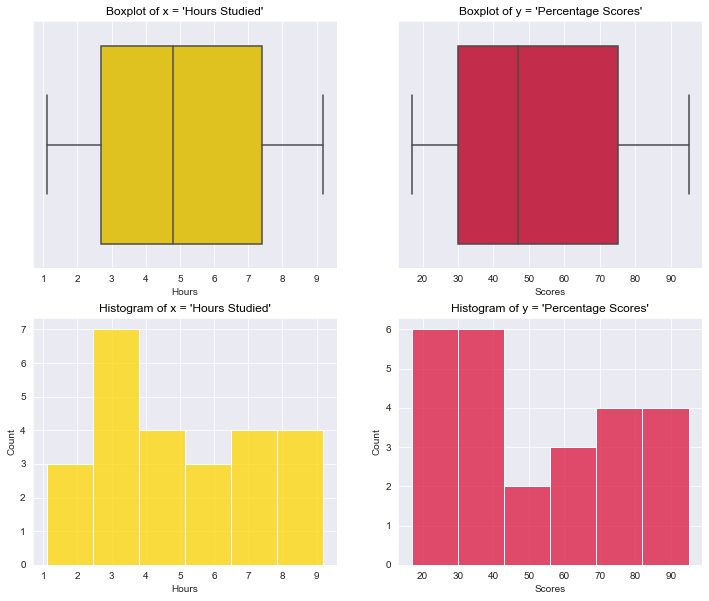

In [8]:
#histogram and boxplot of two variables

sns.set_style('darkgrid')
f = plt.figure(figsize=(12, 10))
gs = f.add_gridspec(2, 2)

ax = f.add_subplot(gs[0, 0])
sns.set_style('darkgrid')
sns.boxplot(x = 'Hours',data = data,color = 'gold')
plt.title('Boxplot of x = \'Hours Studied\'',color = 'k')

ax = f.add_subplot(gs[0, 1])
sns.boxplot(x = 'Scores',data = data,color = 'crimson')
plt.title('Boxplot of y = \'Percentage Scores\'',color = 'k')

ax = f.add_subplot(gs[1, 0])
sns.histplot(data['Hours'],color = 'gold')
plt.title('Histogram of x = \'Hours Studied\'',color = 'k')

ax = f.add_subplot(gs[1, 1])
sns.histplot(data['Scores'],color = 'crimson')
plt.title('Histogram of y = \'Percentage Scores\'',color = 'k')

plt.show()

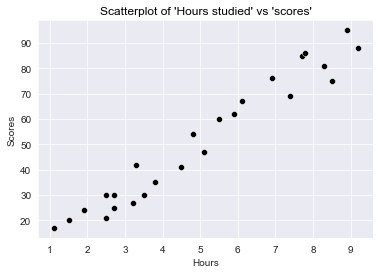

Correlation coefficient between two variables are :  0.98


In [9]:
#scatterplot

sns.set_style('darkgrid')
sns.scatterplot(x = 'Hours', y = 'Scores', data = data,color = 'k')
plt.title('Scatterplot of \'Hours studied\' vs \'scores\'',color = 'k')
plt.show()

corr = pearsonr(data['Hours'],data['Scores'])
print('Correlation coefficient between two variables are : ',round(corr[0],2))

We can see that with the increasing values of 'Hours Studied' the value of the 'Percentage Scores' are also increasing. So we can fit a baseline regression model i.e. linear regression to the dataset where 'Hours Studied' will be our independent variable and 'Percentage Scores' will be our response variable

## 3. Model Building

### 3.1 Fitting a Linear Regression Model

In [10]:
#splitting x and y for modelling purpose
x = data['Hours'].values.reshape(-1,1)
y = data['Scores']

#splitting the data into train and test for evaluating the model later
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 69)

#fitting linear regression model
model = sm.OLS(y_train, sm.add_constant(x_train)).fit() 
print('Model trained successfully!')
model.summary()

Model trained successfully!


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     372.4
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           1.78e-13
Time:                        16:06:10   Log-Likelihood:                -62.472
No. Observations:                  20   AIC:                             128.9
Df Residuals:                      18   BIC:                             130.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5548      2.988      0.186      0.855      -5.722       6.831
x1            10.0474      0.521     19.298      0.000       8.954      11.141
==============================================================================
Omnibus:                        3.572   Durbin-Watson:                   2.454
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                1.352
Skew:                          -0.101   Prob(JB):                        0.509
Kurtosis:                       1.742   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.2 Checking Assumption of Linear Regression
For fitting a linear regression model to a dataset we assume some conditions to be true beforehand. If the conditions are not satisfied then we have to make necessary changes to our model.
Some assumptions are - 
1) Errors are normally distributed

2) Errors are homoscedastic

#### 3.2.1 Checking normality of errors

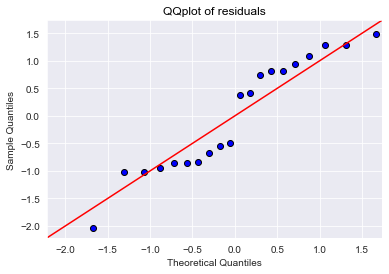

ShapiroResult(statistic=0.9096149802207947, pvalue=0.06266792118549347)

In [11]:
#checking normality of residuals

#qqplot of studentised residuals
influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal
sns.set_style('darkgrid')
sm.qqplot(standardized_residuals,line = '45',color = 'k')
plt.title('QQplot of residuals',color = 'k')
plt.show()

#shapiro-wilk test for normality
shapiro(standardized_residuals)

1. In the QQ-plot of residuals we observe that almost all the points more or less fall around the 45 degree straight line.
2. Higher p-value (> 0.05) for the shapiro wilk test supports the null hypothesis that errors are normally distributed.

#### 3.2.2 Checking homoscedasticity of errors

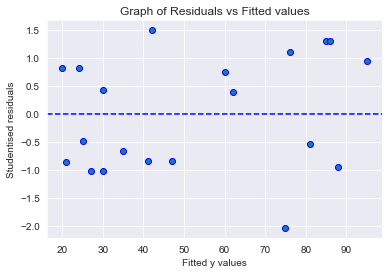

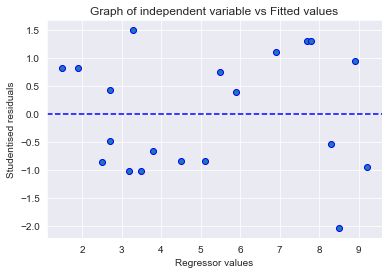

In [12]:
sns.set_style('darkgrid')

#fitted values vs residual plot
plt.scatter(y_train,standardized_residuals,edgecolors = 'blue')
plt.axhline(y = 0, color = 'blue',linestyle = '--')
plt.title('Graph of Residuals vs Fitted values')
plt.xlabel('Fitted y values')
plt.ylabel('Studentised residuals')
plt.show()

#independent variable vs residual plot
plt.scatter(x_train,standardized_residuals,edgecolors = 'blue')
plt.axhline(y = 0, color = 'blue',linestyle = '--')
plt.title('Graph of independent variable vs Fitted values')
plt.xlabel('Regressor values')
plt.ylabel('Studentised residuals')
plt.show()

1. No pattern detected in the plot of residuals against fitted response which indicates variance of residuals does not increase or decrease with predicted responses,i.e. there is no non-constant variance.
2. From the residual vs independent observations plot we can’t find any patterns of residuals. Hence the residuals can be assumed to be independently distributed with the regressor. Again, residuals are plotted randomly against the regressor, i.e. linear term in regressor are enough in the model. Hence no higher order term of the regressors is necessary.

### 3.3 Visualising the Regression Line

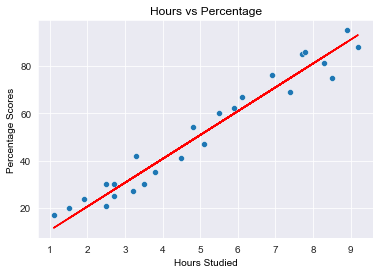

In [13]:
regn_line = model.params[0] + model.params[1]*x

sns.scatterplot(x = 'Hours',y = 'Scores',data = data)    
plt.title('Hours vs Percentage',color = 'k')
plt.xlabel('Hours Studied',color = 'k')
plt.ylabel('Percentage Scores',color = 'k')
plt.plot(x, regn_line,'red');
plt.show()

## 4. Using the model for prediction

### 4.1 Using test set for prediction

In [14]:
y_pred = model.predict(sm.add_constant(x_test))

#comparing actual scores with predicted scores
pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred}) 

,Actual Scores,Predicted Scores
19,69,74.905761
18,67,61.844106
16,30,25.673372
21,54,48.782452
14,17,11.606975


### 4.2 Predicting with certain choosen value

In [21]:
#let
hours = 6.5
#then our prediction for score from the model will be
pred_score = model.predict([1,hours])
print(f"If a student studied {hours} hours the his/her expected score is {round(pred_score[0],2)}")

If a student studied 6.5 hours the his/her expected score is 65.86


## 5.Evaluating the model

In [26]:
print('Mean Absolute Error:', 
      mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      mean_squared_error(y_test, y_pred)) 
print('Coefficient of determination (R-2 score) :', 
      r2_score(y_test, y_pred)) 

Mean Absolute Error: 5.199770934490493
Mean Squared Error: 27.297695382292762
Coefficient of determination (R-2 score) : 0.9356550646278221


So our linear regression model seems a very good fit to the data as it has coefficient of determinantion of 0.94; i.e. 94% of the variability in y(percentage scores) has been explained by the least square linear regression of x(hours of study) on y(percentage scores)